# Calibration Framework Demonstration
(gmoellen, 2024Aug21, 2024Sep10)

Load the calibration framework toy:

(NB: Set your path accordingly!)

In [1]:
#execfile('/Users/gmoellen/NGCASA/CALDEF/cal.py')
from cal import *

## Basic VisJones construction and manipulation

### GJones
Make an empty GJones:

In [2]:
G=GJones()

VisJones summary:
 visEqType=G calTypeName=GJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=-1 nAntPar=-1
 chanDepPar=False chanDepMat=False nChanPar=-1 nChanMat=-1
 nPol=2 nPar=1
 pars.shape=(0,) Jones.shape=(0,)



Set fundamental shapes:

In [3]:
G.setParShape(nTime=1, nAnt=1, nChanPar=1)
G.info()

VisJones summary:
 visEqType=G calTypeName=GJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=1 nAntPar=1
 chanDepPar=False chanDepMat=False nChanPar=1 nChanMat=1
 nPol=2 nPar=1
 pars.shape=(0,) Jones.shape=(0,)



Initialize the parameters to default values:

In [4]:
G.initPar()
G.info()
G.pars

VisJones summary:
 visEqType=G calTypeName=GJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=1 nAntPar=1
 chanDepPar=False chanDepMat=False nChanPar=1 nChanMat=1
 nPol=2 nPar=1
 pars.shape=(1, 1, 1, 2, 1) Jones.shape=(0,)


array([[[[[1.+0.j],
          [1.+0.j]]]]])

NB: Default gain parameters are 1+0j

Simulate some plausible gains:

In [5]:
G.simPar()
G.pars

array([[[[[-1.07211019-0.25126715j],
          [-0.73518995-0.65297032j]]]]])

Generate the Jones matrix:

In [6]:
G.calcJones()
G.Jones

array([[[[[-1.07211019-0.25126715j,  0.        +0.j        ],
          [ 0.        +0.j        , -0.73518995-0.65297032j]]]]])

NB: The complex gains appear on the diagonal of a 2x2 matrix.


Reshape with more antennas, and try setting nChanPar>1:

In [7]:
G.setParShape(nTime=1,nAnt=6,nChanPar=1024)
G.info()

VisJones summary:
 visEqType=G calTypeName=GJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=1 nAntPar=6
 chanDepPar=False chanDepMat=False nChanPar=1 nChanMat=1
 nPol=2 nPar=1
 pars.shape=(0,) Jones.shape=(0,)


(NB: for GJones, nChanPar=1 is enforced)

Simulate pars, Jones:

In [8]:
G.simPar()
G.info()
print('G.pars=',G.pars)
G.calcJones()
G.info()
print('G.Jones=',G.Jones)

VisJones summary:
 visEqType=G calTypeName=GJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=1 nAntPar=6
 chanDepPar=False chanDepMat=False nChanPar=1 nChanMat=1
 nPol=2 nPar=1
 pars.shape=(1, 6, 1, 2, 1) Jones.shape=(0,)
G.pars= [[[[[ 0.32275292+1.09612283j]
    [-1.03818523-0.36420432j]]]


  [[[ 0.6962226 +0.74039402j]
    [ 0.74082693+0.76393144j]]]


  [[[-0.86365914+0.66555613j]
    [-0.99843324-0.36495806j]]]


  [[[-1.00660013+0.44753565j]
    [ 0.55062159-0.85649535j]]]


  [[[ 0.46036027-0.80824771j]
    [-0.43411322+0.74062205j]]]


  [[[-0.85817382-0.530624j  ]
    [ 0.55306444+0.71708124j]]]]]
VisJones summary:
 visEqType=G calTypeName=GJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=1 nAntPar=6
 chanDepPar=False chanDepMat=False nChanPar=1 nChanMat=1
 nPol=2 nPar=1
 pars.shape=(1, 6, 1, 2, 1) Jones.shape=(1, 6, 1, 2, 2)
G.Jones= [[[[[ 0.32275292+1.09612283j  0.        +0.j        ]
    [ 0.        +0.j         -1.03818523-0.36420432j]]]




NB:  A 2x2 matrix for each antenna.


Now, plot the gain "spectra" (only on channel, but we can see the distribution of amplitudes and phases):

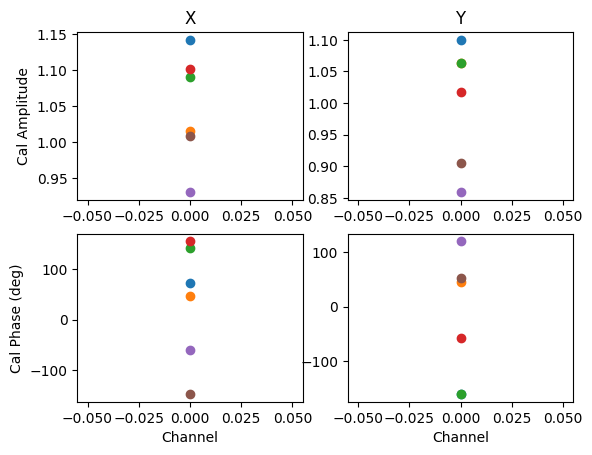

In [9]:
G.plotSpec()

Plot the gains in the complex plane:

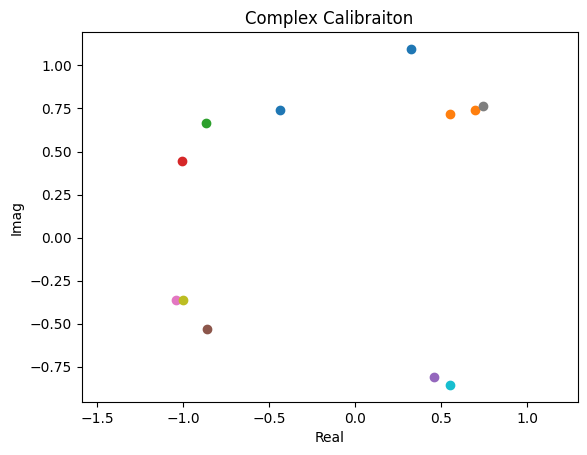

In [10]:
G.plotArgand()

### BJones
Make and simulate a BJones (a nontrivially channelized form of GJones):

VisJones summary:
 visEqType=B calTypeName=BJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=-1 nAntPar=-1
 chanDepPar=True chanDepMat=True nChanPar=-1 nChanMat=-1
 nPol=2 nPar=1
 pars.shape=(0,) Jones.shape=(0,)


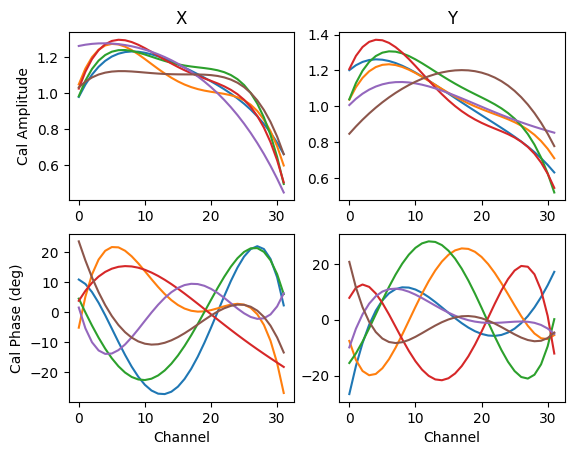

In [11]:
B=BJones()
B.setParShape(nTime=1,nAnt=6,nChanPar=32)
B.simPar()
B.plotSpec()

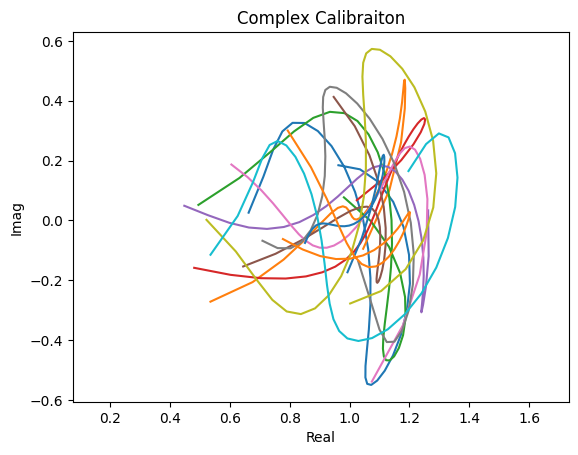

In [12]:
B.plotArgand()

### Instrumental Polarization (JOrElJones)
Make and simulate mildly mis-oriented feeds (deployment to simulations performed below is TBD)

VisJones summary:
 visEqType=J calTypeName=JOrElJones parType=FLOAT matType=GENERAL polBasis=LINEAR
 nTimePar=-1 nAntPar=-1
 chanDepPar=True chanDepMat=True nChanPar=-1 nChanMat=-1
 nPol=2 nPar=2
 pars.shape=(0,) Jones.shape=(0,)


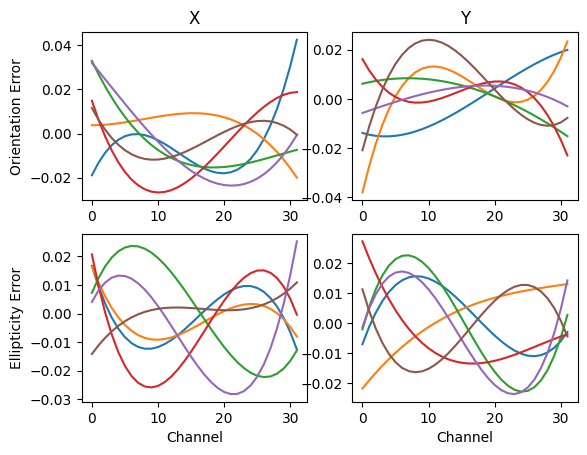

In [13]:
Jpol=JOrElJones()
Jpol.setParShape(nTime=1,nAnt=6,nChanPar=32)
Jpol.simPar()
Jpol.plotSpec()



## VisEquation

In [14]:
B=BJones()
G=GJones()
D=DJones()
C=CJones()
P=PJones()

VisJones summary:
 visEqType=B calTypeName=BJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=-1 nAntPar=-1
 chanDepPar=True chanDepMat=True nChanPar=-1 nChanMat=-1
 nPol=2 nPar=1
 pars.shape=(0,) Jones.shape=(0,)
VisJones summary:
 visEqType=G calTypeName=GJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=-1 nAntPar=-1
 chanDepPar=False chanDepMat=False nChanPar=-1 nChanMat=-1
 nPol=2 nPar=1
 pars.shape=(0,) Jones.shape=(0,)
VisJones summary:
 visEqType=D calTypeName=DJones parType=COMPLEX matType=GENERAL polBasis=LINEAR
 nTimePar=-1 nAntPar=-1
 chanDepPar=True chanDepMat=True nChanPar=-1 nChanMat=-1
 nPol=2 nPar=1
 pars.shape=(0,) Jones.shape=(0,)
VisJones summary:
 visEqType=C calTypeName=CJones parType=FLOAT matType=GENERAL polBasis=LINEAR
 nTimePar=-1 nAntPar=-1
 chanDepPar=False chanDepMat=False nChanPar=-1 nChanMat=-1
 nPol=1 nPar=1
 pars.shape=(0,) Jones.shape=(0,)
VisJones summary:
 visEqType=P calTypeName=PJones parType=FLOAT matType=GENERAL polB

Create a VisEquation to organize polarimetry heuristics

In [15]:
VE=VisEquation()

1. Prelim G on B calibrator, using P:

In [16]:
VE.setApply(P)
VE.setSolve(G)
VE.showSolveVE()
#VE.solve()  NYI!

Arranging VE to apply: P PJones <calfilename(TBD)>
Arranging VE to solve for GJones (G)
Solving ( Vobs ) = G ( P[0].Vmod )
...for GJones (G)
Pre-applying: 
    P[0] PJones <calfilename(TBD)>


In [17]:
VE.setApply(G)
VE.setSolve(B)
VE.showSolveVE()
#VE.solve()  NYI!

Clearing solve term from VisEquation
Arranging VE to apply: G GJones <calfilename(TBD)>
Arranging VE to solve for BJones (B)
Solving ( Vobs ) = B ( G[0].P[1].Vmod )
...for BJones (B)
Pre-applying: 
    G[0] GJones <calfilename(TBD)>
    P[1] PJones <calfilename(TBD)>


In [18]:
VE=VisEquation() # reset the VE (removes prelim G from apply list)
VE.setApply(P)
VE.setApply(B)
VE.setSolve(G)
VE.showSolveVE()
#VE.solve()  NYI!

Arranging VE to apply: P PJones <calfilename(TBD)>
Arranging VE to apply: B BJones <calfilename(TBD)>
Arranging VE to solve for GJones (G)
Solving ( B[0]'.Vobs ) = G ( P[1].Vmod )
...for GJones (G)
Pre-applying: 
    B[0] BJones <calfilename(TBD)>
    P[1] PJones <calfilename(TBD)>


In [19]:
VE.setApply(G)
VE.setSolve(D)
VE.showSolveVE()
#VE.solve()  NYI!

Clearing solve term from VisEquation
Arranging VE to apply: G GJones <calfilename(TBD)>
Arranging VE to solve for DJones (D)
Solving ( G[1]'.B[0]'.Vobs ) = D ( P[2].Vmod )
...for DJones (D)
Pre-applying: 
    B[0] BJones <calfilename(TBD)>
    G[1] GJones <calfilename(TBD)>
    P[2] PJones <calfilename(TBD)>


In [20]:
VE.setApply(D)
VE.setSolve(C)
VE.showSolveVE()
#VE.solve()  NYI!

Clearing solve term from VisEquation
Arranging VE to apply: D DJones <calfilename(TBD)>
Arranging VE to solve for CJones (C)
Solving ( D[2]'.G[1]'.B[0]'.Vobs ) = C ( P[3].Vmod )
...for CJones (C)
Pre-applying: 
    B[0] BJones <calfilename(TBD)>
    G[1] GJones <calfilename(TBD)>
    D[2] DJones <calfilename(TBD)>
    P[3] PJones <calfilename(TBD)>


In [21]:
VE.setApply(C)
VE.showCorrectVE()
#VE.correct()  (no data content here)

Clearing solve term from VisEquation
Arranging VE to apply: C CJones <calfilename(TBD)>
Correcting VE:  Vcorr = P[4]'.C[3]'.D[2]'.G[1]'.B[0]'.Vobs
 Applying: 
    B[0] BJones <calfilename(TBD)>
    G[1] GJones <calfilename(TBD)>
    D[2] DJones <calfilename(TBD)>
    C[3] CJones <calfilename(TBD)>
    P[4] PJones <calfilename(TBD)>


In [22]:
T=TJones()
VE.setSolve(T)
VE.showSolveVE()

VisJones summary:
 visEqType=T calTypeName=TJones parType=COMPLEX matType=SCALAR polBasis=LINEAR
 nTimePar=-1 nAntPar=-1
 chanDepPar=False chanDepMat=False nChanPar=-1 nChanMat=-1
 nPol=1 nPar=1
 pars.shape=(0,) Jones.shape=(0,)
Arranging VE to solve for TJones (T)
Solving ( P[4]'.C[3]'.D[2]'.G[1]'.B[0]'.Vobs ) = T ( Vmod )
...for TJones (T)
Pre-applying: 
    B[0] BJones <calfilename(TBD)>
    G[1] GJones <calfilename(TBD)>
    D[2] DJones <calfilename(TBD)>
    C[3] CJones <calfilename(TBD)>
    P[4] PJones <calfilename(TBD)>


Alternatively (and more likely), solve for T from previously corrected data.

Also note that _any_ term can be self-calibrated!

## Visibility Simulation

Create a VisData in which we'll deposit simulated visibilities:

In [23]:
VD=VisData(nTime=1,nAnt=4,nChan=64)
VD.info()

VisData summary:
 nTime=1 nAnt=4 nBln=None nChan=64 polBasis=LINEAR doAC=None
 a1=[]
 a2=[]
 S=[]
 M.shape=(0,) Mcor.shape=(0,) Vobs.shape=(0,) Vcor.shape=(0,)


To start, this is just an empty data container.


Now, simulate B,G errors (according to VisData shapes), and arrange a VisEquation:

In [24]:
G=GJones(verbose=False)
B=BJones(verbose=False)

VE=VisEquation()
for ic in [B,G]:
    ic.setParShapeFromVisData(VD,False)  # no time-dependance
    ic.simPar() # done globally, since these cal may be applied over many data chunks!
    ic.info()
    VE.setApply(ic)

VisJones summary:
 visEqType=B calTypeName=BJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=1 nAntPar=4
 chanDepPar=True chanDepMat=True nChanPar=64 nChanMat=64
 nPol=2 nPar=1
 pars.shape=(1, 4, 64, 2, 1) Jones.shape=(0,)
Arranging VE to apply: B BJones <calfilename(TBD)>
VisJones summary:
 visEqType=G calTypeName=GJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=1 nAntPar=4
 chanDepPar=False chanDepMat=False nChanPar=1 nChanMat=1
 nPol=2 nPar=1
 pars.shape=(1, 4, 1, 2, 1) Jones.shape=(0,)
Arranging VE to apply: G GJones <calfilename(TBD)>


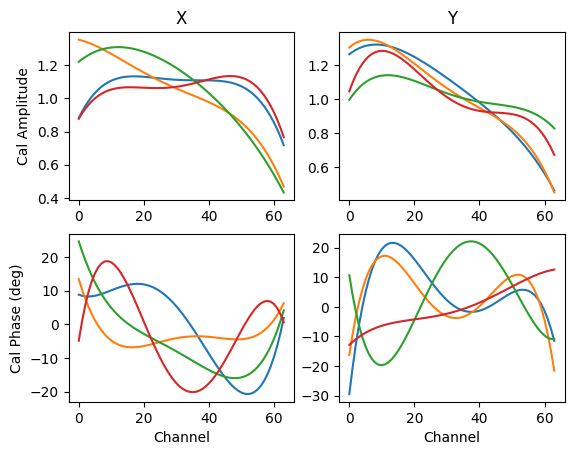

In [25]:
B.plotSpec()

Plot G:

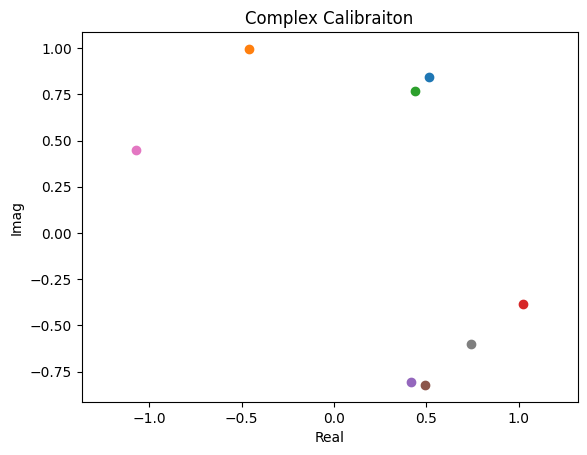

In [26]:
G.plotArgand()

Simulate visibilities for a 20% linearly polarized source, with added noise:

In [27]:
VD.observe(VE,S=[1,0.12,0.16,-0.001],sig=0.01)
VD.info(showAve=True)

Corrupting VE:  Vobs = B[0].G[1].Vtrue 
 Applying: 
    G[1] GJones <calfilename(TBD)>
    B[0] BJones <calfilename(TBD)>
VisData summary:
 nTime=1 nAnt=4 nBln=6 nChan=64 polBasis=LINEAR doAC=False
 a1=[0, 0, 0, 1, 1, 2]
 a2=[1, 2, 3, 2, 3, 3]
 S=[1, 0.12, 0.16, -0.001]
 M.shape=(1, 1, 1, 4) Mcor.shape=(0,) Vobs.shape=(1, 6, 64, 4) Vcor.shape=(0,)
 mean(Vobs)=[ 0.35131602+0.58226104j -0.02878864+0.03353467j -0.03051911-0.08418228j
 -0.00652778+0.0513604j ]


Plot simulated visibilities:

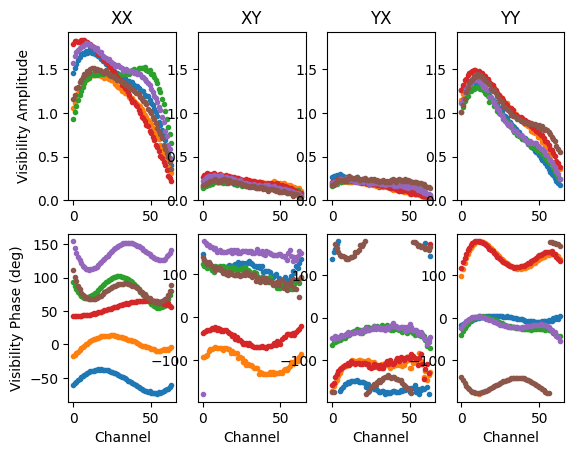

In [28]:
VD.plotSpec(V=VD.Vobs)

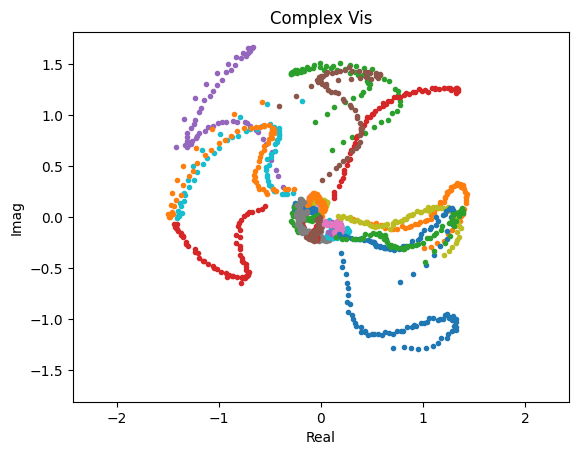

In [29]:
VD.plotArgand(V=VD.Vobs)

Arranging VE to apply: B BJones <calfilename(TBD)>
Correcting VE:  Vcorr = B[0]'.Vobs
 Applying: 
    B[0] BJones <calfilename(TBD)>
VisData summary:
 nTime=1 nAnt=4 nBln=6 nChan=64 polBasis=LINEAR doAC=False
 a1=[0, 0, 0, 1, 1, 2]
 a2=[1, 2, 3, 2, 3, 3]
 S=[1, 0.12, 0.16, -0.001]
 M.shape=(1, 1, 1, 4) Mcor.shape=(0,) Vobs.shape=(1, 6, 64, 4) Vcor.shape=(1, 6, 64, 4)
 mean(Vobs)=[ 0.35131602+0.58226104j -0.02878864+0.03353467j -0.03051911-0.08418228j
 -0.00652778+0.0513604j ]
 mean(Vcor)=[ 0.28743676+0.50542832j -0.023882  +0.02891446j -0.04144195-0.0724342j
 -0.03559115+0.04524916j]


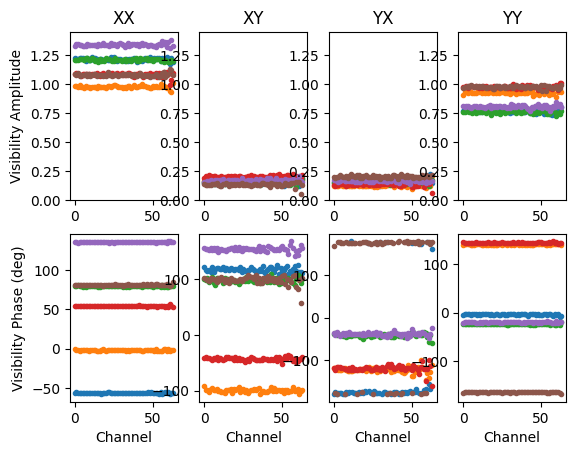

In [30]:
VE=VisEquation()
VE.setApply(B)
VD.correct(VE)
VD.info(showAve=True)
VD.plotSpec(V=VD.Vcor)

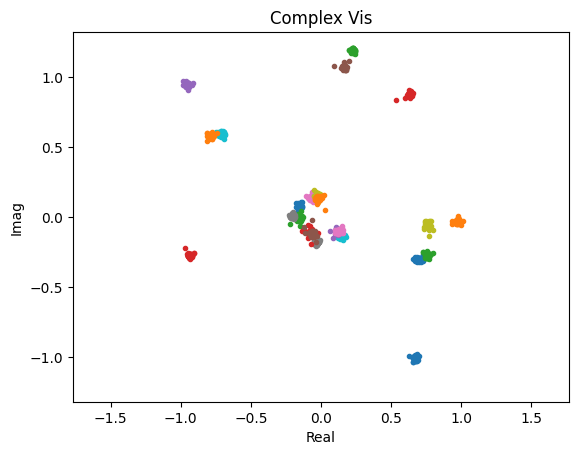

In [31]:
VD.plotArgand(V=VD.Vcor)

Arrange to also apply G, correct and plot:

Arranging VE to apply: B BJones <calfilename(TBD)>
Arranging VE to apply: G GJones <calfilename(TBD)>
Correcting VE:  Vcorr = G[1]'.B[0]'.Vobs
 Applying: 
    B[0] BJones <calfilename(TBD)>
    G[1] GJones <calfilename(TBD)>
VisData summary:
 nTime=1 nAnt=4 nBln=6 nChan=64 polBasis=LINEAR doAC=False
 a1=[0, 0, 0, 1, 1, 2]
 a2=[1, 2, 3, 2, 3, 3]
 S=[1, 0.12, 0.16, -0.001]
 M.shape=(1, 1, 1, 4) Mcor.shape=(0,) Vobs.shape=(1, 6, 64, 4) Vcor.shape=(1, 6, 64, 4)
 mean(Vobs)=[ 0.35131602+0.58226104j -0.02878864+0.03353467j -0.03051911-0.08418228j
 -0.00652778+0.0513604j ]
 mean(Vcor)=[1.12013465-0.00051083j 0.16000828-0.00094936j 0.1593802 +0.00073503j
 0.87956347-0.00030596j]


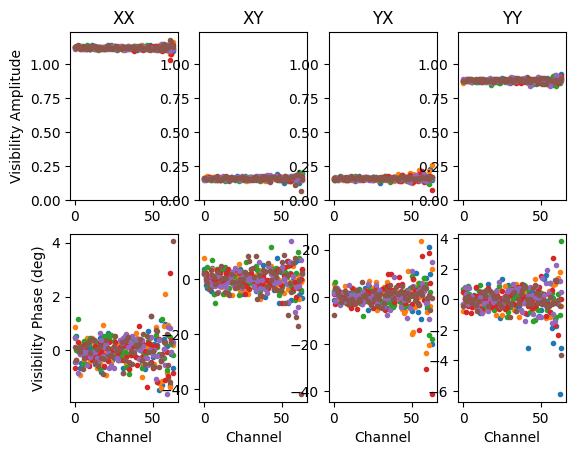

In [32]:
VE=VisEquation()  # reset (multi-run safety)
VE.setApply(B)
VE.setApply(G)
VD.correct(VE)
VD.info(showAve=True)
VD.plotSpec(V=VD.Vcor)

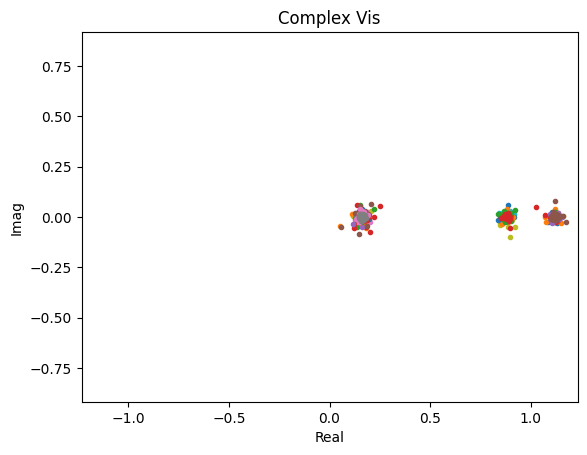

In [33]:
VD.plotArgand(V=VD.Vcor)

## "High-volume" Experiment...

In [34]:
nAntennas=80   # increase this!
VD=VisData(nTime=1,nAnt=nAntennas,nChan=64)
VD.info()

VisData summary:
 nTime=1 nAnt=80 nBln=None nChan=64 polBasis=LINEAR doAC=None
 a1=[]
 a2=[]
 S=[]
 M.shape=(0,) Mcor.shape=(0,) Vobs.shape=(0,) Vcor.shape=(0,)


In [35]:
G=GJones(verbose=False)
B=BJones(verbose=False)
VE=VisEquation()
for ic in [B,G]:
    ic.setParShapeFromVisData(VD,False)  # no time-dependance
    ic.simPar() # done globally, since these cal may be applied over many data chunks!
    ic.info()
    VE.setApply(ic)

VisJones summary:
 visEqType=B calTypeName=BJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=1 nAntPar=80
 chanDepPar=True chanDepMat=True nChanPar=64 nChanMat=64
 nPol=2 nPar=1
 pars.shape=(1, 80, 64, 2, 1) Jones.shape=(0,)
Arranging VE to apply: B BJones <calfilename(TBD)>
VisJones summary:
 visEqType=G calTypeName=GJones parType=COMPLEX matType=DIAGONAL polBasis=LINEAR
 nTimePar=1 nAntPar=80
 chanDepPar=False chanDepMat=False nChanPar=1 nChanMat=1
 nPol=2 nPar=1
 pars.shape=(1, 80, 1, 2, 1) Jones.shape=(0,)
Arranging VE to apply: G GJones <calfilename(TBD)>


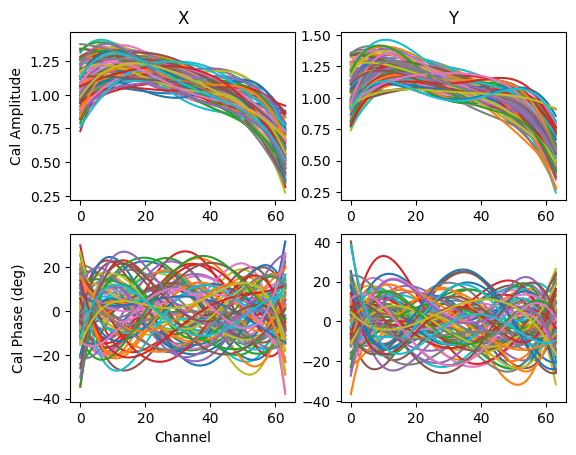

In [36]:
B.plotSpec()

In [37]:
VD.observe(VE,S=[1,0.12,0.16,-0.001],sig=0.01)
VD.info(showAve=True)

Corrupting VE:  Vobs = B[0].G[1].Vtrue 
 Applying: 
    G[1] GJones <calfilename(TBD)>
    B[0] BJones <calfilename(TBD)>
VisData summary:
 nTime=1 nAnt=80 nBln=3160 nChan=64 polBasis=LINEAR doAC=False
 a1=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]...
 a2=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]...
 S=[1, 0.12, 0.16, -0.001]
 M.shape=(1, 1, 1, 4) Mcor.shape=(0,) Vobs.shape=(1, 3160, 64, 4) Vcor.s

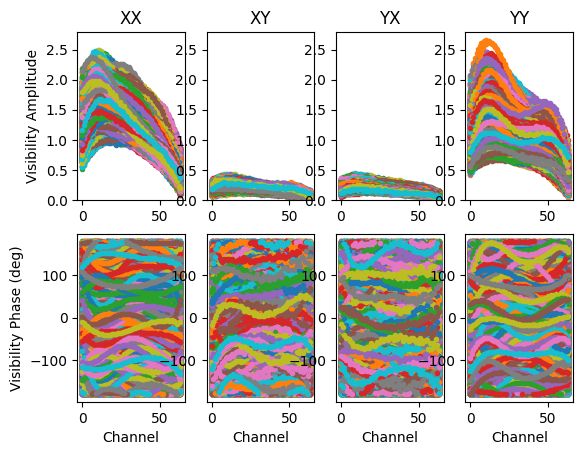

In [38]:
VD.plotSpec(V=VD.Vobs)

In [39]:
VD.correct(VE)
VD.info(showAve=True)

Correcting VE:  Vcorr = G[1]'.B[0]'.Vobs
 Applying: 
    B[0] BJones <calfilename(TBD)>
    G[1] GJones <calfilename(TBD)>
VisData summary:
 nTime=1 nAnt=80 nBln=3160 nChan=64 polBasis=LINEAR doAC=False
 a1=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]...
 a2=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]...
 S=[1, 0.12, 0.16, -0.001]
 M.shape=(1, 1, 1, 4) Mcor.shape=(0,) Vobs.shape=(1, 3160, 64, 4) Vcor.

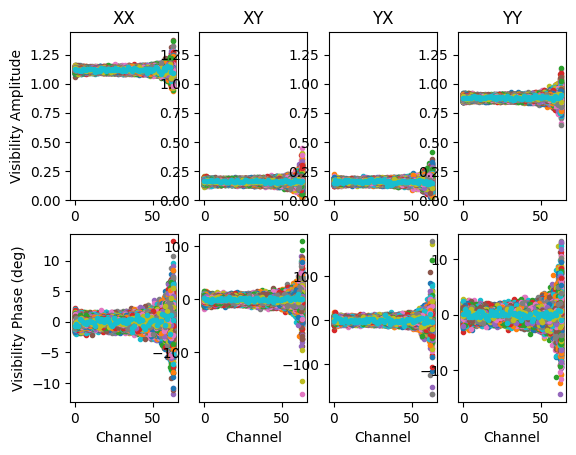

In [40]:
VD.plotSpec(V=VD.Vcor)

Done.